# 3. 평가 지표와 측정 (Evaluation Indicators and Measurements)
- 지금까지 분류 성능 평가에 정확도(정확하게 분류된 샘플의 비율)를 사용했고, 회귀 성능 평가에는 R^2을 사용
- 그러나 주어진 데이터셋에 대한 지도 학습 모델의 성능을 재는 방법은 그 외에도 많음
- 실전에서 애플리케이션에 따라 이런 평가 지표가 적합하지 않을 수 있으므로, 모델을 선택하고 매개변수를 튜닝할 때 올바른 지표를 선택하는 것이 중요

## 3-1. 최종 목표를 기억하라
- 평가 지표를 선택할 때 머신러닝 애플리케이션의 최종 목표를 기억해야 함
- 실제로 정확한 예측을 만드는 것뿐 아니라 큰 의사 결정 프로세스의 일부로 사용하는 데 더 중점을 둬야 할 지 모름
- 머신러닝 평가 지표를 선택하기 전에 비즈니스 지표라고 부르는 애플리케이션의 고차원적인 목표를 생각해야 함
- 어떤 머신러닝 애플리케이션에서 특정 알고리즘을 선택하여 나타난 결과를 비즈니스 임팩트(Business Impact)라고 함
- 고차원적인 목표는 교통사고를 피하거나 입원 환자 수를 줄이는 것일지 모름
- 또는 더 많은 유저를 유입시키거나 쇼핑몰에서 사용자의 소비를 늘리는 것일 수 있음
- 모델을 선택하고 매개변수를 조정할 때, 이런 비즈니스 지표에 긍정적인 영향을 주는 모델과 매개변수를 선택해야 함
- 많은 경우에 특정 모델이 비즈니스에 미치는 영향은 실제 운영 시스템에 적용해야 알 수 있기 때문에 어려운 문제
- 개발 초기 단계에서 매개변수를 조정하기 위해 시험 삼아 모델을 운영 시스템에 곧바로 적용하기란 비즈니스적으로나 개인적으로나 위험부담이 커서 현실적으로 불가능함
- 자율 주행 자동차의 보행자 회피 기능을 먼저 검증하지 않고 실전에 투입하여 평가한다고 생각해봄
- 모델이 나쁘다면 보행자가 위험에 처하게되고, 그러므로 계산하기 쉬운 평가 지표를 이용한 대리 평가 방식을 종종 사용
- 예를 들면 보행자와 보행자가 아닌 이미지를 분류하는 테스트를 수행해서 정확도를 측정할 수 있음
- 이는 대체 방식이므로 평가가 가능하고 원래 비즈니스 목적에 가장 가까운 지표를 찾아야 함
- 이 근사 지표는 모델을 평가할 때나 선택할 때마다 사용해야 함
- 평가의 결과는 하나의 숫자가 아닐 수 있지만, 선택한 모델의 예상 비즈니스 임펙트를 나타내야 함
- 예를 들어 어떤 알고리즘을 적용하면 고객 수는 10% 늘지만 고객당 매출은 15% 줄어들 수 있음

## 3-2. 이진 분류의 평가 지표
- 이진 분류는 실전에서 가장 널리 사용하고 개변도 쉬운 머신러닝 알고리즘
- 하지만 이 간단한 작업을 평가하는 데에도 주의할 점이 많음
- 여러 평가 지표를 들여다보기 전에, 정확도를 잘못 측정하는 경우에 대해 살펴보겠음. 이진 분류에는 양성 클래스와 음성 클래스가 있으며 양성 클래스가 주요 관심 클래스 임

### 에러의 종류
- 잘못 분류한 샘플의 수가 원하는 정보의 전부는 아니므로, 정확도만으로 예측 성능을 측정하기에는 부족할 때가 종종 있음
- 자동화 테스트로 암을 조기 발견하는 애플리케이션을 가정
- 테스트가 음성이면 건강하다는 뜻, 반대로 양성이면 추가 검사를 받아야 함
- 여기서 양성 테스트(암 진단)를 양성 클래스라고 하고 음성 테스트를 음성 클래스라고 함
- 모델이 항상 완벽하게 작동하는 것은 아니니, 잘못 분류할 때가 있음
- 어떤 어플리캐이션에서든 이런 분류 오류가 실제 현실에서 어떤 결과를 초래하는지 살펴봐야 함
- 예컨데 건강한 사람을 양성으로 분류하면 추가 검사를 받게 할 것
- 이는 환자에게 비용 손실과 불편함을 가져다 줌
- 이와 같은 잘못된 양성 예측을 거짓 양성(False Positive)이라 함
- 반대로 암에 걸린 사람을 음성으로 분류하여 제대로 된 검사나 치료를 받지 못하게 할 때도 있음
- 암을 발견하지 못하면 건강에 심각한 위협을 가하며 치명적일 수 있음
- 이런 종류의 잘못된 음성 예측 오류를 거짓 음성(False Negative)이라 함
- 통계학에서 거짓 양성을 타입1 에러, 거짓 음성을 타입2 에러라고도 함
- 여기서는 명확하고 기억하기 쉬운 '거짓 음성', '거짓 양성'을 사용
- 암 진단 예에서는 거짓 음성을 최대한 피해야 하는 반면, 거짓 양성은 비교적 중요도가 낮음
- 이 예는 특시 극단적이지만 일반적으로도 거짓 양성의 중요도와 거짓 음성의 중요도가 비슷한 경우는 매우 드뭄
- 상업적인 애플리케이션에서는 두 오류를 비용으로 환산하여, 예측 오류로 인한 금전적 손해를 측정한 값을 정확도 대신 사용하기도 함
- 이런 방식이 어떤 모델을 사용할 지 비즈니스 관점에서 판단하는 데 더 도움이 될 수 있음

### 불균형 데이터셋
- 이 두 종류의 에러(거짓 양성과 거짓 음성)는 두 클래스 중 하나가 다른 것보다 훨씬 많을 때 더 중요
- 실제로 이는 매우 흔한 상황이며, 좋은 예로는 어떤 아이템이 사용자에게 보여진 노출(Impression) 데이터로 클릭을 예측하는 것
- 아이템은 광고일 수도 있고, 관련 기사나 소셜 미디어 사이트에서 팔로우를 위해 추천하는 사람일 수도 있음
- 목표는 특정 상품을 보여주면 사용자가 클릭을 할지(즉 관심 대상인지)를 예측하는 것
- 인터넷에서 볼 수 있는 정보 대부분은 클릭까지 이어지지 않음
- 그래서 사용자가 관심 있는 것을 클릭할 때까지 100개의 광고나 글을 보여줘야 할 수도 있음
- 이때 클릭이 아닌 데이터 99개와 클릭 데이터 1개가 데이터셋으로 만들어짐
- 다르게 말하면 샘플의 99%가 '클릭 아님' 클래스에 속함
- 이렇게 한 클래스가 다른 것보다 훨씬 많은 데이터셋을 불균형 데이터셋(Imbalanced Dataset) 또는 불균형 클래스의 데이터셋이라 함
- 현실에서 불균형 데이터가 훨씬 많으며, 관심 대상인 이벤트의 빈도가 그렇지 않은 이벤트와 같거나 비슷한 경우는 드뭄
- 클릭을 99% 정확도로 예측하는 분류기를 만들었다고 가정, 이는 99% 정확도는 꽤 높아 보이지만 이는 불균형 클래스를 고려하지 못했음
- 굳이 머신러닝 모델을 만들지 않고서도 무조건 '클릭 아님'으로 예측하면 그 정확도는 99% 임
- 하지만 불균형 데이터에서도 99% 정확도는 사실 매우 좋은 성능일 수 있음
- 그래서 정확도로는 '무조건 클릭 아님' 모델과 '진짜 좋은 모델'을 구분하기 어려움

In [2]:
# digits 데이터셋을 사용해 숫자 9를 다른 숫자와 구분해서 9:1의 불균형한 데이터셋을 만듦
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()
y = digits.target == 9
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

In [3]:
# 항상 다수인 클래스 (여기서는 '9 아님')를 예측값으로 내놓는 DummyClassifier를 사용해서 정확도를 계산
from sklearn.dummy import DummyClassifier
import numpy as np

dummy_majority = DummyClassifier(strategy="most_frequent").fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("예측된 유니크 레이블:", np.unique(pred_most_frequent))
print("테스트 점수: {:.2f}".format(dummy_majority.score(X_test, y_test)))

예측된 유니크 레이블: [False]
테스트 점수: 0.90


- 거의 아무것도 학습하지 않고 90% 정확도를 얻었음
- 모델의 정확도가 90%인 경우, 매우 훌륭하다고 생각할 수 있음
- 하지만 문제에 따라서는 그저 무조건 한 클래스를 예측하기만 해도 될 수 있음

In [4]:
# 실제 분류기를 사용한 것과 비교
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("테스트 점수: {:.2f}".format(tree.score(X_test, y_test)))

테스트 점수: 0.92


- 정확도로 보면 DecisionTreeClassifier가 더미 분류기보다 조금 나을 뿐
- 이는 DecisionTreeClassifier를 잘못 사용했거나 이 문제에서는 정확도가 높은 측정 방법이 아님을 말해줌
- 비교를 위해 LogisticRegression과 DummyClassifier 분류기 두 개를 더 살펴보겠음
- DummyClassifier는 무작위로 선택하므로 훈련 세트와 같은 비율의 예측값을 만듦

In [5]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier(strategy="stratified").fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("dummy 점수: {:.2f}".format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(C=0.1, max_iter=1000).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg 점수: {:.2f}".format(logreg.score(X_test, y_test)))

dummy 점수: 0.83
logreg 점수: 0.98


- 무작위로 예측하는 더미 분류기는 (정확도로 봐서는) 확실히 결과가 안 좋음
- 반면에 LogisticRegression은 매우 좋음
- 하지만 더미 분류기조차도 80%를 맞혔음
- 이런 결과가 실제로 유용한 것인지 판단하기가 매우 어려움
- 불균형 데이터셋에서 예측 성능을 정량화하는 데 정확도는 적절한 측정 방법이 아니기 때문
- 모델 선택을 도와주는 다른 평가 지표를 살펴보겠음
- 특히 pred_most_frequent와 pred_dummy처럼, 빈도나 무작위 기반 예측보다 얼마나 더 나은지 알려주는 평가 지표가 필요
- 모델을 평가하는 지표라면 이런 비상식적인 예측은 피할 수 있어야 함

### 오차 행렬 (Confusion Matrix)
- 오차 행렬은 이진 분류 평가 결과를 나타낼 때 가장 널리 사용하는 방법 중 하나
- 앞 절의 LogisticRegression 예측 결과를 confusion_matrix 함수를 사용해서 확인
- 테스트 세트의 예측 결과는 pred_logreg에 저장되어 있음

In [6]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print("오차 행렬:\n", confusion)

오차 행렬:
 [[402   1]
 [  6  41]]


- confusion_matrix의 출력은 2 * 2 배열
- 행은 정답 클래스에 해당, 열은 예측 클래스에 해당
- 각 항목의 숫자는 행에 해당하는 클래스(여기에서는 '9 아님'과 '9')가 얼마나 많이 열에 해당하는 클래스로 분류되었는지를 나타냄

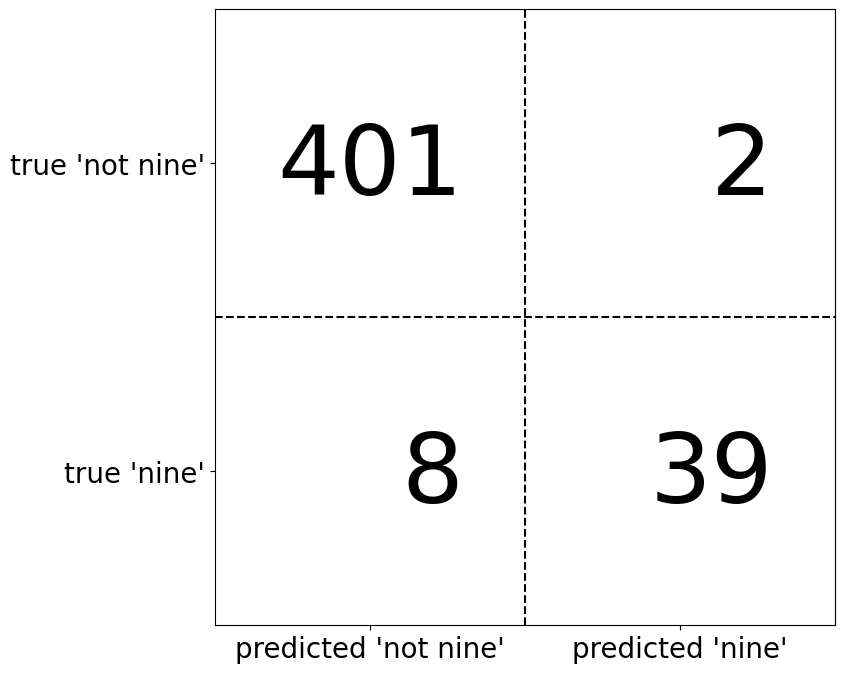

In [7]:
# '9와 9 아님' 분류 문제의 오차 행렬
import mglearn

mglearn.plots.plot_confusion_matrix_illustration()

- 오차 행렬의 대각 행렬은 정확히 분류된 경우이고, 다른 항목은 한 클래스의 샘플들이 다른 클래스로 잘못 분류된 경우가 얼마나 많은지를 알려줌
- 숫자 9를 양성 클래스로 정의하면 오차 행렬의 항목을 앞서 이야기한 거짓 양성과 거짓 음성에 연결할 수 있음
- 전체 그림을 완성하기 위해 양성 클래스로 올바르게 분류한 샘플을 진짜 양성 (True Positive)이라 하고, 음성 클래스로 정확하게 분류한 샘플을 진짜 음성 (True Negative)이라 하겠음
- 이들 용어를 축약해서 FP, FN, TP, TN이라고 쓰며, 오차 행렬에서 다음과 같이 표시

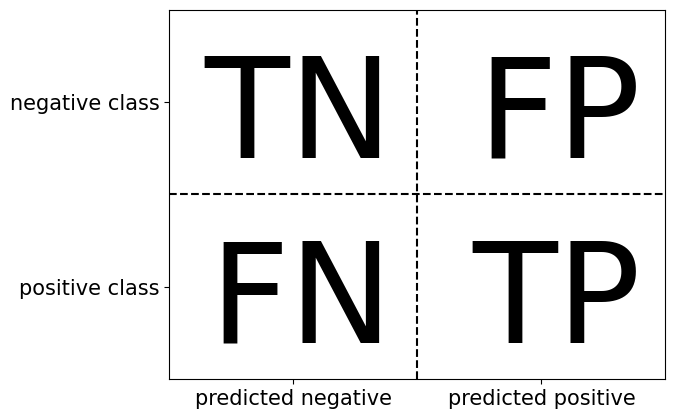

In [8]:
# 이진 분류의 오차 행렬
mglearn.plots.plot_binary_confusion_matrix()

In [9]:
# 오차 행렬을 사용하여 앞서 만든 모델들(더미 모델 두 개, 결정 트리, 로지스틱 회귀)을 비교
print("빈도 기반 더미 모델:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\n무작위 더미 모델:")
print(confusion_matrix(y_test, pred_dummy))
print("\n결정 트리:")
print(confusion_matrix(y_test, pred_tree))
print("\n로지스틱 회귀")
print(confusion_matrix(y_test, pred_logreg))

빈도 기반 더미 모델:
[[403   0]
 [ 47   0]]

무작위 더미 모델:
[[364  39]
 [ 41   6]]

결정 트리:
[[390  13]
 [ 24  23]]

로지스틱 회귀
[[402   1]
 [  6  41]]


- 오차 행렬을 보면 pred_most_frequent에서 뭔가 잘못된 것이 확실
- 항상 동일한 클래스를 예측하기 때문
- 반면에 pred_dummy는 특히 거짓 음성(FN)과 거짓 양성(FP)보다 진짜 양성(TP)이 매우 적고(4), 진짜 양성(TP)보다 거짓 양성(FP)이 매우 많음
- 결정 트리의 예측은 더미 분류기보다 정상으로 보이지만, 정확도는 거의 비슷
- 마지막으로 로지스틱 회귀는 모든 면에서 pred_tree보다 나음
- 진짜 양성(TP)과 진짜 거짓(TN)이 더 많은 반면, 거짓 양성(FP)과 거짓 음성(FN)은 적음
- 이렇게 비교하니 결정 트리와 로지스틱 회귀의 결과만 정상이며 로지슽틱 회귀가 모든 항목에서 트리 모델보다 잘 작동했음
- 그러나 전체 오차 행렬을 조사하기는 솔직히 조금 번거로움
- 이 행렬의 모든 면을 살펴보면 많은 정보를 얻을 수 있지만, 매우 수동적이며 정상적인 방법임

- ConfusionMatrixDisplay 클래스는 추정기 객체로부터 오차 행렬을 그리는 from_estimator 함수와 예측 결과로부터 오차 행렬을 그리는 from_predictions 함수를 제공
- 먼저 from_estimator 함수를 사용, 필요한 매개변수는 추정기 객체(여기서는 앞서 훈련한 logreg 객체)와 특성 데이터(X_test), 타깃 데이터(y_test)임
- 클래스 레이블을 별도로 지정하려면 display_labels 매개변수를 사용

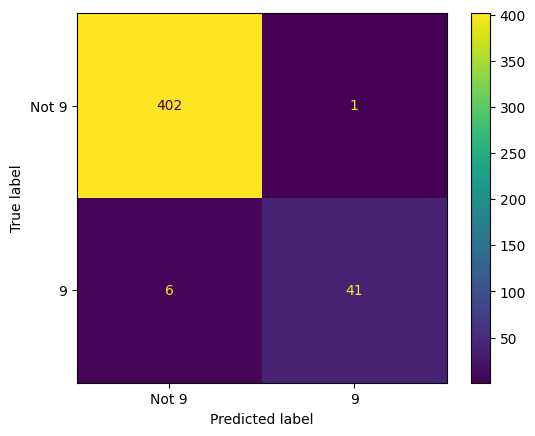

In [10]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test, display_labels=["Not 9", "9"])
plt.show();

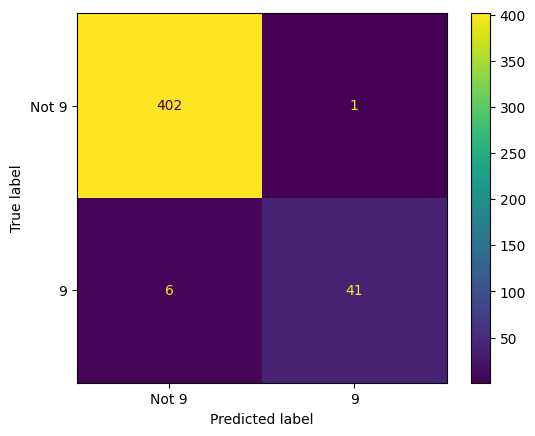

In [11]:
# from_predictions 함수에는 타깃 데이터(y_test)와 추정기로부터 얻은 예측 데이터(pred_logred)를 전달
ConfusionMatrixDisplay.from_predictions(y_test, pred_logreg, display_labels=["Not 9", "9"])
plt.show();

### 정확도와의 관계
- 오차 행렬의 결과를 요약하는 방법으로는 정확도로 표현하는 것
- 정확도는 정확히 예측한 수 (TP와 TN)를 전체 샘플 수(오차 행렬의 모든 항목을 더한 값)로 나눈 것
- 정확도 = (TP + TN) / (TP + TN + FP + FN)

### 정밀도, 재현율, f-점수
- 오차 행렬의 결과를 요약한느 여러 방법 중 가장 일반적인 것은 정밀도(Precision)와 재현율(Recall) 임
- 정밀도는 양성으로 예측된 것(TP + FP) 중 얼마나 많은 샘플이 진짜 양성(TP)인지 측정함
- 정밀도 = TP / (TP + FP)
- 정밀도는 거짓 양성(FP)의 수를 줄이는 것이 목표일 때 성능 지표로 사용함
- 예를 들어 임상 실험을 통해 신약의 치료 효과를 예측하는 모델을 생각해보겠음
- 임상 실험은 비싸기로 유명해서 제약 회사의 경우, 단 한번의 실험으로 신약의 효과를 검증하기를 원함
- 그렇기 때문에 모델이 거짓 양성(FP)를 많이 만들지 않는 것이 중요
- 다른 말로 하면 높은 정밀도가 필요. 정밀도는 양성 예측도(PPV)라고도 함
- 한편 재현율은 전체 양성 샘플(TP + FN) 중에서 얼마나 많은 샘플이 양성 클래스(TP)로 분류되는지를 측정
- 재현율 = TP / (TP + FN)
- 재현율은 모든 양성 샘플을 식별해야 할 때 성능 지표로 사용함
- 즉 거짓 음성(FN)을 피하는 것이 중요할 때 임
- 이 장의 앞부분에 나온 암 진단 사례는 이에 해당하는 좋은 예 임
- 건강한 사람이 일부 포함되더라도 암에 걸린 사람을 빠짐없이 찾는 것이 중요
- 재현율을 민감도(Sensitivity), 적중률(Hit Rate), 진짜 양성 비율(TPR)이라고도 함
- 재현율 최적화와 정밀도 최적화는 상충함
- 모든 샘플을 진짜 음성(TN)이 하나도 없고 모두 양성 클래스에 속한다고 예측하면, 거짓 음성(FN)이 없어져 재현율이 완벽해짐
- 하지만 모든 샘플을 양성으로 예측하면 거짓 양성(FP)을 많이 만들고, 따라서 정밀도는 매우 낮아짐
- 다른 한편으로 데이터 포인트 하나만 양성이고 나머지는 음성이라고 예측한다면 정밀도는 (진짜 그 데이터 포인트가 양성이라면) 완벽
- 하지만 재현율은 매우 낮아질 것
- 정밀도와 재현율이 매우 중요한 측정 방법이지만, 둘 중 하나만으로는 전체 그림을 볼 수 없음
- 정밀도와 재현율의 조화 평균인 f-점수(f-score) 또는 f-측정(f-measure)은 이 둘을 하나로 요약해 줌
- F = 2 * (정밀도 * 재현율) / (정밀도 + 재현율)
- 특별히 이 공식을 f1-점수라고도 함
- 정밀도와 재현율을 같이 고려하므로 불균형한 이진 분류 데이터셋에서는 정확도보다 더 나은 지표가 될 수 있음
- 앞서 계산한 '9와 9 아님' 데이터셋의 예측에 적용해보겠음
- 여기서 숫자 '9'가 양성 클래스('9'는 True, 나머지는 False 레이블을 가짐)이므로 양성 클래스가 소수(Minority) 클래스임

In [12]:
from sklearn.metrics import f1_score
print("빈도 기반 더미 모델의 f1 scoreL {:.2f}".format(f1_score(y_test, pred_most_frequent)))
print("무작위 더미 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("트리 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_tree)))
print("로지스틱 회귀 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_logreg)))

빈도 기반 더미 모델의 f1 scoreL 0.00
무작위 더미 모델의 f1 score: 0.13
트리 모델의 f1 score: 0.55
로지스틱 회귀 모델의 f1 score: 0.92


- 여기서 두 가지를 주목해야 함. 하나는 양성 클래스로 예측된 것이 하나도 없어서 빈도 기반 더미 모델이 에러 메시지를 내뱉음(f1-점수의 분모가 0이 됨)
- 또한 무작위 더미 분류기와 트리 분류기 사이에서도 정확도에는 없던 뚜렷한 차이를 볼 수 있음
- f1-점수를 사용해 평가하면 예측 성능이 다시 하나의 숫자로 요약됨
- 하지만 어떤 모델이 좋은지 직관적으로 판단하는 데는 정확도보다 f1-점수가 나음
- 그러나 f1-점수는 정확도보다 이해하거나 설명하기 어렵다는 게 단점
- classification_report 함수는 정밀도, 재현율, f1-점수 모두를 한 번에 계산해서 깔끔하게 출력

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent, target_names=["Not 9", "9"], zero_division=0))

              precision    recall  f1-score   support

       Not 9       0.90      1.00      0.94       403
           9       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



- classification_report 함수는 클래스마다 (여기에서는 True와 False) 한 줄씩 출력을 만들고, 각 클래스가 양성일 때 정밀도, 재현율, f1-점수를 리포트함
- 이전에 소수 클래스인 숫자 '9'를 양성 클래스로 간주했음
- 만약 양성 클래스를 '9 아님'으로 바꾼다면 classification_report 출력에서 볼 수 있듯이 most_frequent 모델의 f1-점수가 0.94임
- 더 나아가 모든 샘플은 '9 아님'으로 분류하기 때문에 '9 아님' 클래스의 재현율이 1임
- f1-점수 오른쪽의 마지막 열은 각 클래스에 대한 지지도(Support)로, 단순히 이 클래스에 있는 진짜 샘플의 수
- 분류 리포트의 마지막 새 줄은 정밀도, 재현율, f1-점수의 평균을 보여줌
- macro avg는 단순히 클래스별 점수의 평균을 계산한 것
- weighted avg는 클래스의 샘플 수로 가중 평균한 것
- 두 클래스를 평균한 것이므로 양성 클래스의 개념이 필요하지 않음
- 양성 클래스의 정밀도나 재현율 점수만 보는 것에 비해 두 클래스를 평균하면 숫자 하나로 된 의미 있는 지표를 얻을 수 있음
- 무작위 더미 분류기와 로지스틱 회귀의 리포트도 확인

In [14]:
print(classification_report(y_test, pred_dummy, target_names=["Not 9", "9"]))

              precision    recall  f1-score   support

       Not 9       0.90      0.90      0.90       403
           9       0.13      0.13      0.13        47

    accuracy                           0.82       450
   macro avg       0.52      0.52      0.52       450
weighted avg       0.82      0.82      0.82       450



In [15]:
print(classification_report(y_test, pred_logreg, target_names=["Not 9", "9"]))

              precision    recall  f1-score   support

       Not 9       0.99      1.00      0.99       403
           9       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



- 무작위 더미 모델과 가장 좋은 성능의 로지스틱 회귀 모델은 그렇게 확연히 차이 나지 않음
- 어떤 클래스를 양성 클래스로 선택하느냐가 이 평가 지표에 큰 영향을 끼침
- 무작위 더미 모델에서 '9'클래스의 f1-점수가 0.12이지만 (로지스틱 회귀는 0.89). '9 아님' 클래스는 각각 0.89와 0.99라서 양쪽 모두 수긍할 만한 결과임
- 하지만 모든 숫자를 함께보면 정확한 판단을 내릴 수 있어 로지스틱 회귀 모델의 우수성을 알 수 있음

### 불확실성 고려
- 오차 행렬과 분류 리포트가 예측 결과를 자세히 분석할 수 있도록 도와줌
- 하지만 예측값은 모델에 담긴 많은 정보가 이미 손실된 상태
- 대부분의 분류기는 예측의 확신을 가늠하기 위한 decision_function이나 predict_proba 메서드를 제공
- 예측을 만들어내는 것은 decision_function이나 predict_proba 출력의 임계값으로 사용함
- 다음 예는 음성 클래스 데이터 포인트 400개와 양성 클래스 데이터 포인트 50개로 이워진 불균형한 이진 분류 문제
- 훈련 데이터는 왼쪽에 나타나 있음
- 이 데이터셋에 커널 SVM을 학습시키고, 훈련 데이터 그래프 오른쪽에 결정 함수 값을 히트맵으로 나타냈음
- 중앙 윗부분에 있는 검은 원은 decision_function이 정확히 0일 때의 임계점을 나타냄
- 이 원 안의 포인트는 양성 클래스로 분류되며 바깥쪽 포인트는 음성 클래스로 분류됨

In [16]:
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=(400, 50), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=0.05).fit(X_train, y_train)

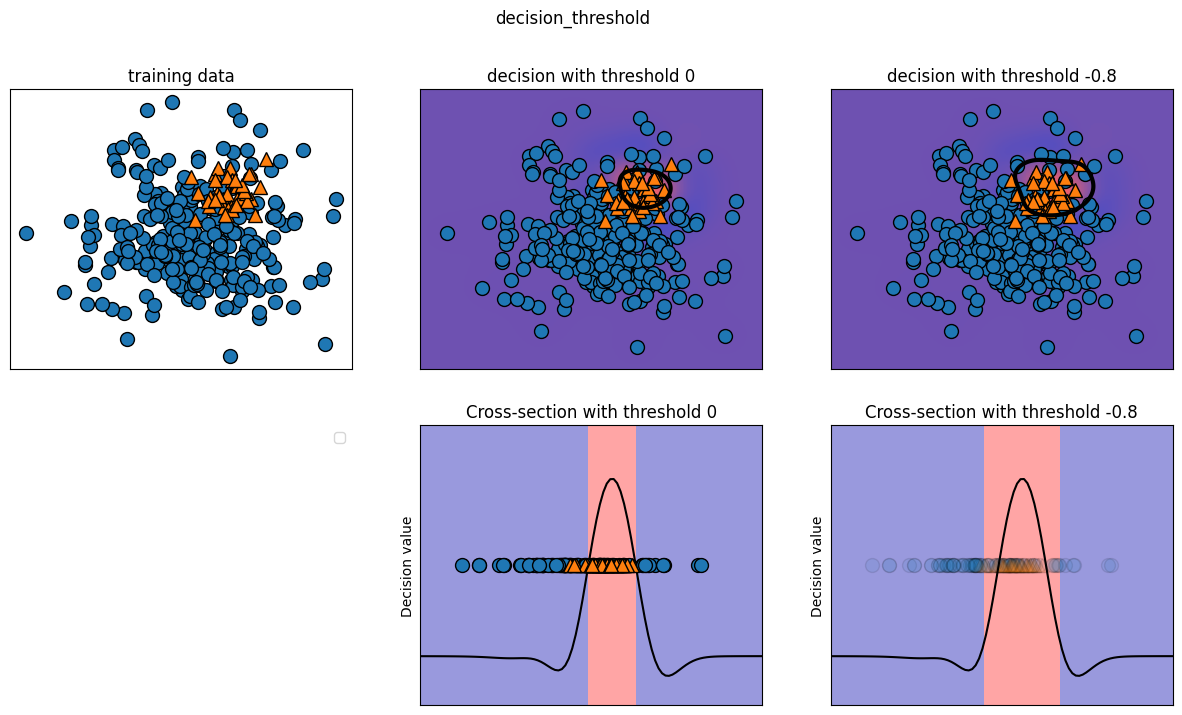

In [18]:
# 결정 함수의 히트맵과 임계값 변화에 따른 영향
mglearn.plots.plot_decision_threshold()

In [19]:
# classification_report 함수를 사용해서 두 클래스의 정밀도와 재현율을 평가
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



- 클래스 1에 대해 상당히 작은 정밀도를 얻었으며 재현율은 절반 정도
- 클래스 0의 샘플이 매우 많으므로 분류기는 소수인 클래스 1보다 클래스 0에 초점을 맞추고 있음
- 이 어플리케이션이 앞의 암 진단 예와 같이 클래스 1의 재현율을 높이는 게 중요하다고 가정해보겠음
- 이 말은 (클래스 1로 잘못 분류된) 거짓 양성(FP)이 늘어나더라도 (재현율을 높이기 위해) 진짜 양성(TP)을 늘리려 한다는 뜻
- svc.predict로 만든 예측은 이 조건을 충족하지 못하지만, 임계값을 바꿔 클래스 1의 재현율을 높이도록 예측을 조정할 수 있음
- 기본적으로 decision_function의 값이 0보다 큰 포인트는 클래스 1로 분류됨
- 더 많은 포인트가 클래스 1로 분류되려면 임계값을 낮춰야 함

In [20]:
y_pred_lower_threshold = svc.decision_function(X_test) > -0.8

In [21]:
# 이 예측 결과의 분류 리포트를 출력
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

    accuracy                           0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



- 기대한 대로 클래스 1의 재현율이 높아졌고 정밀도는 낮아졌음
- 재현율보다 정밀도가 중요하거나 그 반대, 또는 데이터가 심하게 불균형일 때 결정 함수의 임계값을 바꾸면 더 나은 결과를 쉽게 얻을 수 있음
- decision_function은 임의의 범위를 가지고 있으므로 임계점을 고르는 일반적인 방법을 제시하기는 어려움
- 임계값을 선택할 때 테스트 세트를 사용하지 않도록 주의를 기울여야 함
- 다른 하이퍼파라미터와 마찬가지로 임계값 설정에 테스트 세트를 사용하면 과도하게 낙관적인 결과를 만들 가능성이 높음
- 대신 검증 세트나 교차 검증을 사용하는 것이 바람직
- 여기서는 간단한 예제를 위해 테스트 세트의 결과를 바탕으로 임계값을 선택했지만 실전에서는 테스트 세트를 사용하면 안 됨
- 다른 매개변수들처럼 테스트 세트에서 결정 임계값을 선택하면 과도하게 낙관적인 결과가 나옴
- 대신 검증 세트나 교차 검증을 사용해야 함
- predict_proba 메서드는 출력이 0에서 1 사이로 고정되니 predict_proba를 제공하는 모델은 임계값을 선택하기가 더 쉬움
- 기본값인 0.5를 임계값으로 설정한 모델은 양성 클래스라는 확신이 50% 이상일 때 양성으로 분류
- 임계값을 높이면 양성 클래스로 분류할 때 더 큰 확신이 있어야 함(음성 클래스는 확신이 덜 필요)
- 임의의 임계값보다는 확률을 사용하는 쪽이 더 직관적이지만, 모든 모델이 쓸모 있는 불확실성을 제공하는 것은 아님(최대 깊이까지 자란 DecisionTree는 비록 잘못된 것이라도  항상 100% 확신)
- 이는 보정(Calibration) 개념과 관련이 있고, 보정된 모델은 불확실성을 정확하게 측정하는 모델임

### 정밀도-재현율 곡선과 ROC 곡선
- 모델의 분류 작업을 결정하는 임계값을 바꾸는 것은 해당 분류기의 정밀도와 재현율의 상충 관계를 조정하는 일
- 예를 들면 양성 샘플의 실수(FN)를 10%보다 작게 하여 90% 이상의 재현율을 원할 수 있음
- 이런 결정은 애플리케이션에 따라 다르며 비즈니스 목표에 따라 결정됨
- 어떤 목표가 선택되면 (즉, 어떤 클래스에 대한 특정 재현율 또는 정밀도의 값) 적절한 임계값을 지정할 수 있음
- 다시 말해 90% 재현율과 같은 특정 목적을 충족하는 임계값을 설정하는 것은 언제든 가능함
- 어려운 부분은 이 임계값을 유지하면서 적절한 정밀도를 내는 모델을 만드는 일
- 만약 모든 것을 양성이라고 분류하면 재현율이 100%가 되지만 이런 모델은 쓸모가 없을 것
- 90% 재현율처럼 분류기의 필요조건을 지정하는 것을 종종 운영 포인트(Operating Point)를 지정한다고 말함
- 운영 포인트를 고정하면 비즈니스 목표를 설정할 때 고객이나 조직 내 다른 그룹에 성능을 보장하는 데 도움이 됨
- 새로운 모델을 만들 때는 운영 포인트가 명확하지 않은 경우가 많음
- 이런 경우에는 문제를 더 잘 이해하기 위해 모든 임계값을 조사해보거나, 한 번에 정밀도나 재현율의 모든 장단점을 살펴보는 것이 좋음
- 이를 위해 정밀도-재현율 곡선(Precision-Recall Curve)을 사용함
- sklearn.metrics 모듈에서 정밀도-재현율 곡선을 만드는 함수를 제공
- 이 함수는 타깃 레이블과 decision_function이나 predict_proba 메서드로 계산한 예측 불확실성을 이용

In [22]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

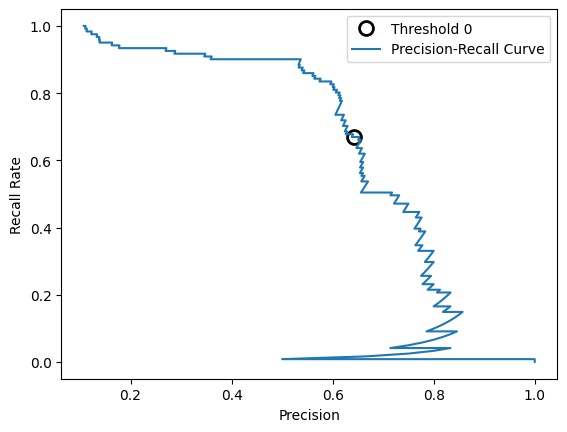

In [24]:
# precision_recall_curve 함수는 가능한 모든 임계값(결정 함수에 나타나느 모든 값)에 대해 정밀도와 재현율의 값을 정렬된 리스트로 반환하므로 곡선 그래프를 그릴 수 있음
# 부드러운 곡선을 위해 데이터 포인트 수를 늘림
# SVC(gamma=0.05)의 정밀도-재현율 곡선
X, y = make_blobs(n_samples=(4000, 500), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

svc = SVC(gamma=0.05).fit(X_train, y_train)

precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))
# 0에 가까운 임계값을 찾음
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], "o", markersize=10, label="Threshold 0", fillstyle="none", c="k", mew=2)

plt.plot(precision, recall, label="Precision-Recall Curve")
plt.xlabel("Precision")
plt.ylabel("Recall Rate")
plt.legend(loc="best");

- 곡선의 각 포인트는 decision_function의 가능한 모든 임계값에 대응함
- 이를 테면 정밀도가 약 0.75일 때의 재현율은 0.4임
- 검은 원은 decision_function의 기본 임계값인 0 지점을 나타냄
- 이 지점은 predict 메서드를 호출할 때사용되는 임계값임
- 곡선이 오른쪽 위로 갈수록 더 좋은 분류기임
- 오른쪽 위 지점은